# Non-hierarchy clustering methods

## Parse data

In [1]:
import docx
import pandas as pd
import numpy as np

filename = 'data1.docx'
doc = docx.Document(filename)

table = doc.tables[0]

# fill array 
ls = []
for row in table.rows:
    row_arr = []
    for cell in row.cells:
        row_arr.append(cell.paragraphs[0].text)
    ls.append(row_arr)

column_names = ls[0]


# clear array
clear_ls = []
for i in range(1, len(ls)-1):
    row = ls[i]
    if row[0] == '':
        continue
    row[0] = int(row[0][-4:])
    for j in range(1, len(row)):
        row[j] = float(row[j].replace(',', '.'))
        
    clear_ls.append(row)
    
# create dataframe
df = pd.DataFrame(clear_ls, columns=column_names)
df.head()


,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1973,92.694,83.870,91.581,88.407,85.844,79.121,79.428,84.400,81.157,92.151,85.784,88.466
1,1974,85.815,78.919,85.190,83.371,79.764,74.245,73.247,76.037,70.511,82.625,83.107,86.454
2,1975,80.824,74.496,83.380,82.132,79.818,76.307,80.037,75.311,73.606,80.468,80.761,85.867
3,1976,84.395,78.024,84.910,85.940,81.650,75.785,73.108,76.539,74.125,85.257,80.926,83.110
4,1977,86.944,91.751,100.826,84.474,85.697,76.247,72.499,76.453,75.446,84.828,86.300,89.536


## Normalize dataframe

In [8]:
# Normalize dataframe
X = df.iloc[:, 1:].values
X = (X - X.mean(axis=0))/X.std(axis=0)

In [3]:
X.mean(axis=0)

array([ 2.85485921e-16, -6.74063979e-17, -4.36159045e-17, -1.47699313e-16,
       -6.27804687e-17,  2.04862582e-16,  2.17088252e-16,  1.36464913e-16,
       -2.27331381e-16, -1.30847714e-16,  1.85037171e-17, -5.68328453e-17])

In [4]:
X.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

## Visualize our data

[-3.8831805  -4.05215782 -4.04913577 -3.99810169 -3.85420296 -3.95553341
 -3.18729151 -3.86457374 -4.05268628 -3.95729822 -3.97727199 -4.14766912
 -3.85189124 -4.35124099 -3.70142392 -2.90467004 -2.65183832 -2.24268971
 -1.59674538 -0.63059918 -0.07336865  0.64925083  1.23652467  1.50856049
  1.67751171  2.0945537   3.23768834  3.76208794  4.27130899  4.40263106
  4.23692235  5.06869425  5.29680111  4.92354393  6.02129551  4.44216051
  3.85325587  3.84202017  3.16605436  2.34189695  1.70480819  1.24599953] [-0.75052916 -0.62449633 -0.56250621 -0.48533423 -0.41636959 -0.31461434
 -0.46766168 -0.04139443 -0.00583302  0.06955833  0.21766594  0.26984624
  0.32424732  0.52964144  0.3937261   0.30750958  0.24435225  0.22424667
  0.16453047 -0.06084676 -0.07255344 -0.15969373 -0.1950769  -0.20847089
 -0.14937298 -0.19026938 -0.4147851  -0.45610809 -0.43855659 -0.49284278
 -0.30122833 -0.42476749 -0.32667068 -0.29002785 -0.45973326  0.20938639
  0.38014195  0.54254394  0.82136615  0.89724344  

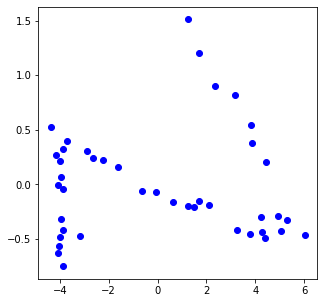

In [18]:
from sklearn import decomposition, preprocessing
import matplotlib.pyplot as plt

scaler = preprocessing.StandardScaler()
normalized_df = scaler.fit_transform(df)

pca = decomposition.PCA(n_components=2, random_state=4)
x, y = pca.fit_transform(normalized_df).T


plt.figure(figsize=(5,5))
plt.scatter(x, y, color='blue')
plt.show()


## Prepare to k-means

In [19]:
# import libraries
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.cluster import KMeans

## Remake our coordinates to sufficient format

In [26]:
X = np.array([[x[i], y[i]] for i in range(len(x))])
X

array([[-3.88318050e+00, -7.50529164e-01],
       [-4.05215782e+00, -6.24496334e-01],
       [-4.04913577e+00, -5.62506205e-01],
       [-3.99810169e+00, -4.85334234e-01],
       [-3.85420296e+00, -4.16369592e-01],
       [-3.95553341e+00, -3.14614343e-01],
       [-3.18729151e+00, -4.67661679e-01],
       [-3.86457374e+00, -4.13944321e-02],
       [-4.05268628e+00, -5.83302170e-03],
       [-3.95729822e+00,  6.95583330e-02],
       [-3.97727199e+00,  2.17665938e-01],
       [-4.14766912e+00,  2.69846245e-01],
       [-3.85189124e+00,  3.24247320e-01],
       [-4.35124099e+00,  5.29641438e-01],
       [-3.70142392e+00,  3.93726096e-01],
       [-2.90467004e+00,  3.07509577e-01],
       [-2.65183832e+00,  2.44352246e-01],
       [-2.24268971e+00,  2.24246673e-01],
       [-1.59674538e+00,  1.64530474e-01],
       [-6.30599178e-01, -6.08467629e-02],
       [-7.33686461e-02, -7.25534393e-02],
       [ 6.49250831e-01, -1.59693727e-01],
       [ 1.23652467e+00, -1.95076899e-01],
       [ 1.

## Create k-means model

In [46]:
kmeans_form = KMeans(n_clusters=3)
kmeans_form.fit(X)
kmeans_form.cluster_centers_ # find cluster centers

array([[-3.5936633 , -0.04860077],
       [ 4.34803572, -0.12702167],
       [ 1.17551382,  0.25746964]])

## Visualize division to clusters

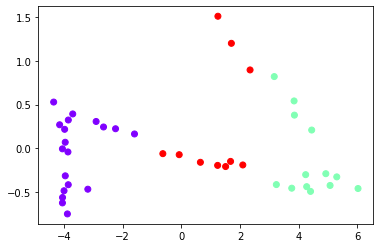

In [47]:
plt.scatter(X[:, 0], X[:, 1], c=kmeans_form.labels_, cmap='rainbow')
plt.show()

## Now visualize with centers

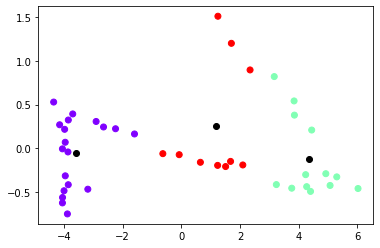

In [49]:
plt.scatter(X[:, 0], X[:, 1], c=kmeans_form.labels_, cmap='rainbow')
plt.scatter(kmeans_form.cluster_centers_[:, 0], kmeans_form.cluster_centers_[:, 1], color='black')
plt.show()